https://www.kaggle.com/datasets/mdismielhossenabir/psychosocial-dimensions-of-student-life

## 1. Clean and modifying data

In [61]:
# the usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [34]:
# load the data
df = pd.read_csv("med_student.csv")

In [35]:
# let's quickly see what we have
df.head()

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,Male,Average,No,Sometimes,Yes,Yes,12,NaN,Yes
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes


In [36]:
# data is quite small which is good to cee clear classification
df.describe()

,Age,SleepPerDayHours,NumberOfFriend
count,99.000000,99.000000,95.000000
mean,22.515152,6.717172,16.189474
std,1.560767,1.738169,25.397811
min,20.000000,4.000000,0.000000
25%,21.000000,5.000000,3.000000
50%,23.000000,7.000000,6.000000
75%,24.000000,8.000000,15.000000
max,25.000000,12.000000,100.000000


In [37]:
# oh wow this is so bad :)
# we have too many duplicates (almost the whole dataset)
df.duplicated().sum()

67

In [38]:
# and we have 4 Nan values
df.isna().sum()

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          4
LikeNewThings                           0
dtype: int64

In [39]:
# Check for duplicate rows
duplicates = df.duplicated()

# Print duplicate rows
print(df[duplicates])

# Alternatively, you can count the number of duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

# I think we have duplicates becuase data is quite genereal
# and might be repetitive for many cases
# I will delete Nan values but let's keep duplicates

    Age   Gender AcademicPerformance TakingNoteInClass DepressionStatus  \
32    23    Male             Average                No        Sometimes   
33    23    Male           Excellent         Sometimes              Yes   
34    24    Male             Average                No        Sometimes   
35    20  Female                Good               Yes        Sometimes   
36    24  Female             Average               Yes              Yes   
..   ...     ...                 ...               ...              ...   
94    21    Male                Good               Yes        Sometimes   
95    21  Female                Good               Yes              Yes   
96    25    Male                Good               Yes        Sometimes   
97    21    Male                Good               Yes               No   
98    22  Female             Average               Yes               No   

   FaceChallangesToCompleteAcademicTask LikePresentation  SleepPerDayHours  \
32                   

In [40]:
# drop Nan values
df = df.dropna()

## Now there will be a bunch of LabelEncoder functions to make data numeric and that can be skipped

In [41]:
# initialize LabelEncoder
label_encoder = LabelEncoder()

# fit LabelEncoder and transform columns
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
Female: 0
Male: 1


In [42]:
# initialize LabelEncoder
label_encoder = LabelEncoder()

# fit LabelEncoder and transform columns
df['AcademicPerformance'] = label_encoder.fit_transform(df['AcademicPerformance'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
Average: 0
Below average: 1
Excellent: 2
Good: 3


In [43]:
# initialize LabelEncoder
label_encoder = LabelEncoder()

# fit LabelEncoder and transform columns
df['TakingNoteInClass'] = label_encoder.fit_transform(df['TakingNoteInClass'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
No: 0
Sometimes: 1
Yes: 2


In [44]:
# initialize LabelEncoder
label_encoder = LabelEncoder()

# fit LabelEncoder and transform columns
df['DepressionStatus'] = label_encoder.fit_transform(df['DepressionStatus'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
No: 0
Sometimes: 1
Yes: 2


In [45]:
# initialize LabelEncoder
label_encoder = LabelEncoder()

# fit LabelEncoder and transform columns
df['FaceChallangesToCompleteAcademicTask'] = label_encoder.fit_transform(df['FaceChallangesToCompleteAcademicTask'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
No: 0
Sometimes: 1
Yes: 2


In [46]:
# initialize LabelEncoder
label_encoder = LabelEncoder()

# fit LabelEncoder and transform columns
df['LikePresentation'] = label_encoder.fit_transform(df['LikePresentation'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
No: 0
Yes: 1


In [47]:
# initialize LabelEncoder
label_encoder = LabelEncoder()

# fit LabelEncoder and transform columns
df['LikeNewThings'] = label_encoder.fit_transform(df['LikeNewThings'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
No: 0
Yes: 1


## Data is clean and numeric and ready for the model

In [48]:
df.head()

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
1,23,1,2,1,2,0,1,8,80.0,1
2,24,1,0,0,1,1,0,8,10.0,1
3,20,0,3,2,1,2,0,5,15.0,1
4,24,0,0,2,2,2,1,5,2.0,1
5,23,1,3,1,1,0,1,8,12.0,1


## 2.  Convert data to X/y and create Random Forest Classifier

In [49]:
# x/y split
X = df.drop('AcademicPerformance', axis=1)
y = df['AcademicPerformance']

In [50]:
# split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [51]:
model = make_pipeline(StandardScaler(), RandomForestClassifier())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

## 3. Metrics

In [52]:
predictions = model.predict(X_test)

In [55]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

# I am not satisfied with results
# I am aiming to have more than 90%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         3
           3       1.00      0.73      0.84        11

    accuracy                           0.88        24
   macro avg       0.88      0.93      0.88        24
weighted avg       0.94      0.88      0.89        24


Model overall accuracy: 87.50%


<Axes: >

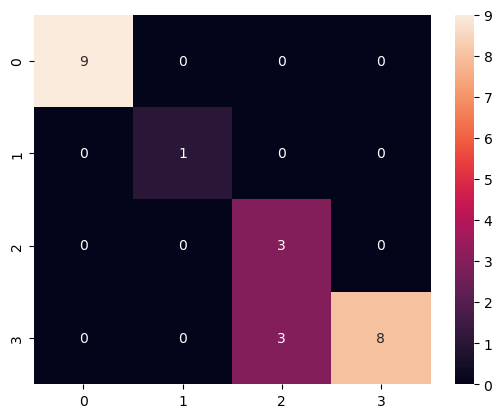

In [59]:
# confusion metrics
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

# not many mistakes

In [82]:
#  Version 1: dtreeviz, more detailed explanations on the nodes in the decision trees (cutoff points etc.)
# pip install dtreeviz
from sklearn.tree import export_graphviz
import subprocess
from sklearn import tree

# for IOS I had to used Brew to install graphviz (brew install graphviz)
# import dtreeviz
viz_model = dtreeviz.model(model,
                           X_train=X, y_train=y,
                           feature_names=X.columns,
                           target_name='Decision',
                           class_names=["No", "Yes"])

# for viewing in the Jupyter notebook
# adjust the scale if you need a bigger picture (for example 2.5)
viz_model.view(scale=1.5).save("dt_bank_test.svg") 

NameError: name 'dtreeviz' is not defined

In [ ]:
import dtreeviz